In [81]:
9# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import phik
from pylab import rcParams

rcParams['figure.figsize'] = 25, 15

# для построения моделей воспользуемся sklearn

import sklearn
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix

%matplotlib inline

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)  #выключаем scintific notation

# ------------------------------------------------------------------------------------------------------------------------------------------------

Часть 1. EDA

    Выберите любой интересующий вас датасет по классификации или регрессии (можно взять из рекозитория https://archive.ics.uci.edu/ml/datasets.php,
    еще неплохие и востребованные на практике варианты - предсказание оттока пользователей https://www.kaggle.com/blastchar/telco-customer-churn
    или предсказание Customer Livetime Value (CLV или LTV) - https://www.kaggle.com/pankajjsh06/ibm-watson-marketing-customer-value-data
    По выбранному датасету проведите EDA, познакомьтесь с признаками, посмотрите зависимости и т.д.

Часть 2. Preprocessing & Feature Engineering

    Хотя цель этого задания - посмотреть на работу алгоритмов, тем не менее пропускать препроцессинг нельзя :)
    Так что переведите категориальные переменные в уникальные лейблы при помощи LabelEncoder,
    попробуйте добавить новые переменные и выкинуть лишние и, наконец, разбейте данные на train-test.

Часть 3. Who's the mightiest of them all?

    Постройте 4 варианта градиентного бустинга, используя значения гиперпараметров “из коробки”: реализация из sklearn, XGBoost, CatBoost, LightGBM
    Проверьте качество на отложенной выборке, кто пока лидирует?
    Теперь проведите настройку гиперпараметров моделей на кросс-валидации, можно настраивать только самые основные гиперпараметры - число итераций бустинга, max_features, subsample и т.д.
    Снова проверьте качество уже настроенных моделей. Кто в итоге победил?

# ------------------------------------------------------------------------------------------------------------------------------------------------

# Dataset loading

In [3]:
DF_EG = pd.read_csv('Data_for_UCI_named.csv')
# Electrical Grid Stability Simulated Data Data Set
# https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+#

In [4]:
DF_EG

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959,3.080,8.381,9.781,3.763,-0.783,-1.257,-1.723,0.650,0.860,0.887,0.958,0.055,unstable
1,9.304,4.903,3.048,1.369,5.068,-1.940,-1.873,-1.255,0.413,0.862,0.562,0.782,-0.006,stable
2,8.972,8.848,3.046,1.215,3.405,-1.207,-1.277,-0.920,0.163,0.767,0.839,0.110,0.003,unstable
3,0.716,7.670,4.487,2.341,3.964,-1.027,-1.939,-0.997,0.446,0.977,0.929,0.363,0.029,unstable
4,3.134,7.609,4.944,9.858,3.526,-1.126,-1.846,-0.554,0.797,0.455,0.657,0.821,0.050,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930,9.488,2.377,6.188,3.343,-0.658,-1.449,-1.236,0.602,0.780,0.814,0.608,0.024,unstable
9996,3.392,1.275,2.955,6.895,4.350,-1.664,-0.952,-1.733,0.502,0.567,0.286,0.366,-0.026,stable
9997,2.364,2.842,8.776,1.009,4.300,-1.381,-0.944,-1.975,0.488,0.987,0.149,0.146,-0.032,stable
9998,9.632,3.994,2.757,7.821,2.515,-0.966,-0.650,-0.899,0.365,0.588,0.889,0.818,0.038,unstable


# Часть 1. EDA

In [5]:
DF_EG.info() # только один object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [6]:
DF_EG.isna().sum() # пропуски отсутствуют

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [7]:
DF_EG['stabf'].unique()

array(['unstable', 'stable'], dtype=object)

In [8]:
DF_EG['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

# Часть 2. Preprocessing & Feature Engineering

In [9]:
DF_EG['stabf_01'] = DF_EG['stabf'].apply(lambda i: 1 if i == 'stable' else 0) #переводим категориальные переменные в уникальные лейблы

In [10]:
AD_DF_EG = DF_EG.drop('stabf', axis=1)

In [11]:
AD_DF_EG

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf_01
0,2.959,3.080,8.381,9.781,3.763,-0.783,-1.257,-1.723,0.650,0.860,0.887,0.958,0.055,0
1,9.304,4.903,3.048,1.369,5.068,-1.940,-1.873,-1.255,0.413,0.862,0.562,0.782,-0.006,1
2,8.972,8.848,3.046,1.215,3.405,-1.207,-1.277,-0.920,0.163,0.767,0.839,0.110,0.003,0
3,0.716,7.670,4.487,2.341,3.964,-1.027,-1.939,-0.997,0.446,0.977,0.929,0.363,0.029,0
4,3.134,7.609,4.944,9.858,3.526,-1.126,-1.846,-0.554,0.797,0.455,0.657,0.821,0.050,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930,9.488,2.377,6.188,3.343,-0.658,-1.449,-1.236,0.602,0.780,0.814,0.608,0.024,0
9996,3.392,1.275,2.955,6.895,4.350,-1.664,-0.952,-1.733,0.502,0.567,0.286,0.366,-0.026,1
9997,2.364,2.842,8.776,1.009,4.300,-1.381,-0.944,-1.975,0.488,0.987,0.149,0.146,-0.032,1
9998,9.632,3.994,2.757,7.821,2.515,-0.966,-0.650,-0.899,0.365,0.588,0.889,0.818,0.038,0


In [12]:
corrmat = AD_DF_EG.corr() #строим матрицу кореляций

In [13]:
corrmat['stabf_01'].sort_values(ascending=True)[:9] # девять самых значимых признаков

stab   -0.827
tau2   -0.246
tau4   -0.239
tau3   -0.237
tau1   -0.235
g3     -0.232
g2     -0.217
g4     -0.205
g1     -0.198
Name: stabf_01, dtype: float64

In [14]:
AD_DF_EG_09 = AD_DF_EG.drop(['p1', 'p2', 'p3', 'p4', 'stab'], axis=1) # дропаем признаки вклад которых меньше всего

In [15]:
AD_DF_EG_09

,tau1,tau2,tau3,tau4,g1,g2,g3,g4,stabf_01
0,2.959,3.080,8.381,9.781,0.650,0.860,0.887,0.958,0
1,9.304,4.903,3.048,1.369,0.413,0.862,0.562,0.782,1
2,8.972,8.848,3.046,1.215,0.163,0.767,0.839,0.110,0
3,0.716,7.670,4.487,2.341,0.446,0.977,0.929,0.363,0
4,3.134,7.609,4.944,9.858,0.797,0.455,0.657,0.821,0
...,...,...,...,...,...,...,...,...,...
9995,2.930,9.488,2.377,6.188,0.602,0.780,0.814,0.608,0
9996,3.392,1.275,2.955,6.895,0.502,0.567,0.286,0.366,1
9997,2.364,2.842,8.776,1.009,0.488,0.987,0.149,0.146,1
9998,9.632,3.994,2.757,7.821,0.365,0.588,0.889,0.818,0


In [164]:
# AD_DF_EG_09.to_csv('AD_DF_EG_09.csv', index=False)

In [1]:
AD_DF_EG_09['stabf_01'].value_counts()

NameError: name 'AD_DF_EG_09' is not defined

In [17]:
# Приготовим набор для тренировки и тестирования
X = AD_DF_EG_09.drop('stabf_01', axis=1)
Y = AD_DF_EG_09['stabf_01']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.55, test_size=0.45, random_state=42, stratify=Y)

In [18]:
X_train.shape, X_test.shape

((5500, 8), (4500, 8))

In [19]:
print(sum(Y_train)/len(Y_train))
print(sum(Y_test)/len(Y_test))

0.362
0.362


# Часть 3. Who's the mightiest of them all?

    sklearn, XGBoost, LightGBM, CatBoost

#  Scikit-Learn

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# sklearn No tuning

In [97]:
# No tuning
sk_no_tn_gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_features=2, max_depth=2, random_state=42)
sk_no_tn_gb_clf.fit(X_train, Y_train)

print("Learning rate: ", 0.1)
print("Accuracy score (training): {0:.3f}".format(sk_no_tn_gb_clf.score(X_train, Y_train)))
print("Accuracy score (validation): {0:.3f}".format(sk_no_tn_gb_clf.score(X_test, Y_test)))

Learning rate:  0.1
Accuracy score (training): 0.899
Accuracy score (validation): 0.873



In [155]:
predictions = sk_no_tn_gb_clf.predict(X_test)

print("Classification Report")
print(classification_report(Y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2871
           1       0.88      0.75      0.81      1629

    accuracy                           0.87      4500
   macro avg       0.88      0.85      0.86      4500
weighted avg       0.87      0.87      0.87      4500



In [143]:
print(f'sk_no_tn_gb_clf Confusion Matrix:\n {confusion_matrix(Y_test, predictions)}')

sk_no_tn_gb_clf Confusion Matrix:
 [[2708  163]
 [ 409 1220]]


In [144]:
print('sk_no_tn_gb_clf roc_auc_score: ', roc_auc_score(Y_test, sk_no_tn_gb_clf.predict_proba(X_test)[:, 1]))

sk_no_tn_gb_clf roc_auc_score:  0.9564571008020555


# sklearn hyperparameter tuning

In [75]:
tn_gb_clf = GradientBoostingClassifier()

# parameters = {
#     "n_estimators":[50,250,500],
#     "max_depth":[1,3,5,7,9],
#     "learning_rate":[0.1, 0.25, 0.35, 0.4, 0.5, 0.6, 0.75, 1]
# }
# cv = GridSearchCV(tn_gb_clf,parameters,cv=5)
# cv.fit(X_train, Y_train.values.ravel())

# Best parameters are: {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 500}
#----------------------------------------------------------------------------------

# for learning_rate in lr_list:
#     tn_gb_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=learning_rate, max_features=2, max_depth=6, random_state=42)
#     tn_gb_clf.fit(X_train, Y_train)
#     tn_predictions = tn_gb_clf.predict(X_test)
#
#     print("Learning rate: ", learning_rate)
#     print("Accuracy score (training): {0:.3f}".format(tn_gb_clf.score(X_train, Y_train)))
#     print("Accuracy score (validation): {0:.3f}".format(tn_gb_clf.score(X_test, Y_test)))
#     print(confusion_matrix(Y_test, tn_predictions))
#     print()
#----------------------------------------------------------------------------------

# parameters = {
#     "n_estimators":[300, 500, 600, 700],
#     "max_depth":[5],
#     "learning_rate":[0.1, 0.35, 0.5, 0.75, 0.8,0.9,1]
# }
# cv = GridSearchCV(tn_gb_clf,parameters,cv=5)
# cv.fit(X_train, Y_train.values.ravel())

# Best parameters are: {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 600}
#----------------------------------------------------------------------------------

# parameters = {
#     "n_estimators":[600, 650, 700],
#     "max_depth":[5],
#     "learning_rate":[1],
#     'max_features':[1,2,3,4,5,6,7,8]
# }
# cv = GridSearchCV(tn_gb_clf,parameters,cv=5)
# cv.fit(X_train, Y_train.values.ravel())

# Best parameters are: {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 650}
#----------------------------------------------------------------------------------
# Best parameters are: {'learning_rate': 1, 'max_depth': 5, 'max_features': 8, 'n_estimators': 650}

#----------------------------------------------------------------------------------

# parameters = {
#     "n_estimators":[650],
#     "max_depth":[5],
#     "learning_rate":[0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.995,1],
#     'max_features':[8]
# }
# cv = GridSearchCV(tn_gb_clf,parameters,cv=5)
# cv.fit(X_train, Y_train.values.ravel())

#----------------------------------------------------------------------------------
# # Best parameters are: {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 500}


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.9, 0.91, 0.92, 0.93, 0.94, 0.95,
                                           0.96, 0.97, 0.98, 0.99, 0.995, 1],
                         'max_depth': [5], 'max_features': [8],
                         'n_estimators': [650]})

In [76]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')


In [77]:
display(cv)
# Best parameters are: {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 500}

Best parameters are: {'learning_rate': 0.95, 'max_depth': 5, 'max_features': 8, 'n_estimators': 650}


0.943 + or -0.006 for the {'learning_rate': 0.9, 'max_depth': 5, 'max_features': 8, 'n_estimators': 650}
0.944 + or -0.007 for the {'learning_rate': 0.91, 'max_depth': 5, 'max_features': 8, 'n_estimators': 650}
0.942 + or -0.006 for the {'learning_rate': 0.92, 'max_depth': 5, 'max_features': 8, 'n_estimators': 650}
0.945 + or -0.005 for the {'learning_rate': 0.93, 'max_depth': 5, 'max_features': 8, 'n_estimators': 650}
0.946 + or -0.006 for the {'learning_rate': 0.94, 'max_depth': 5, 'max_features': 8, 'n_estimators': 650}
0.946 + or -0.005 for the {'learning_rate': 0.95, 'max_depth': 5, 'max_features': 8, 'n_estimators': 650}
0.945 + or -0.008 for the {'learning_rate': 0.96, 'max_depth': 5, 'max_features': 8, 'n_estimators': 650}
0.946 + or -0.005 for the {'learning_rate': 0.97, 'max_depth': 5, 'max_features': 8, 'n_estimators': 650}
0.943 + or -0.005 for the {'learning_rate': 0.98, 

In [78]:
# sklearn best parameters final model launch
BP_gb_clf = GradientBoostingClassifier(n_estimators=650, learning_rate=0.95, max_features=8, max_depth=5, random_state=42)
BP_gb_clf.fit(X_train, Y_train)

print("Accuracy score (training): {0:.3f}".format(BP_gb_clf.score(X_train, Y_train)))
print("Accuracy score (validation): {0:.3f}".format(BP_gb_clf.score(X_test, Y_test)))


Accuracy score (training): 1.000
Accuracy score (validation): 0.944


In [139]:
# sklearn best parameters final confusion_matrix + classification_report
BP_tn_predictions = BP_gb_clf.predict(X_test)

print("Classification Report")
print(classification_report(Y_test, BP_tn_predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2871
           1       0.94      0.91      0.92      1629

    accuracy                           0.94      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.94      0.94      0.94      4500



In [138]:
print(f'BP_gb_clf Confusion Matrix:\n {confusion_matrix(Y_test, BP_tn_predictions)}')

BP_gb_clf Confusion Matrix:
 [[2771  100]
 [ 151 1478]]


In [101]:
print('sk_BP_gb_clf roc_auc_score: ', roc_auc_score(Y_test, BP_gb_clf.predict_proba(X_test)[:, 1]))

sk_BP_gb_clf roc_auc_score:  0.9888617552934565


# Итоги по sklearn

In [218]:
print(f'sk_no_tn_gb_clf Confusion Matrix:\n {confusion_matrix(Y_test, predictions)}\n')
print('sk_no_tn_gb_clf roc_auc_score: ', roc_auc_score(Y_test, sk_no_tn_gb_clf.predict_proba(X_test)[:, 1]))

print(f'\nBP_gb_clf Confusion Matrix:\n {confusion_matrix(Y_test, BP_tn_predictions)}')
print('\nsk_BP_gb_clf roc_auc_score: ', roc_auc_score(Y_test, BP_gb_clf.predict_proba(X_test)[:, 1]))

sk_no_tn_gb_clf Confusion Matrix:
 [[2708  163]
 [ 409 1220]]

sk_no_tn_gb_clf roc_auc_score:  0.9564571008020555

BP_gb_clf Confusion Matrix:
 [[2771  100]
 [ 151 1478]]

sk_BP_gb_clf roc_auc_score:  0.9888617552934565


# XGBoost

In [32]:
# ! conda install  xgboost
# ! pip install xgboost

^C


In [83]:
import xgboost

# xgboost No hyperparameter tuning

In [184]:

xgboost_no_tn_model = xgboost.XGBClassifier(tree_method='gpu_hist',
                                      objective='binary:logistic',
                                      eval_metric="aucpr",
                                      seed=42,
                                      use_label_encoder=False)

xgboost_no_tn_model.fit(
                        X_train,
                        Y_train,
                        verbose=True,
                        early_stopping_rounds=10,
                        eval_set=[(X_test, Y_test)])

[0]	validation_0-aucpr:0.79164
[1]	validation_0-aucpr:0.86161
[2]	validation_0-aucpr:0.89752
[3]	validation_0-aucpr:0.91311
[4]	validation_0-aucpr:0.92470
[5]	validation_0-aucpr:0.93371
[6]	validation_0-aucpr:0.93897
[7]	validation_0-aucpr:0.94218
[8]	validation_0-aucpr:0.94541
[9]	validation_0-aucpr:0.94948
[10]	validation_0-aucpr:0.95210
[11]	validation_0-aucpr:0.95488
[12]	validation_0-aucpr:0.95627
[13]	validation_0-aucpr:0.95814
[14]	validation_0-aucpr:0.95907
[15]	validation_0-aucpr:0.96166
[16]	validation_0-aucpr:0.96226
[17]	validation_0-aucpr:0.96369
[18]	validation_0-aucpr:0.96544
[19]	validation_0-aucpr:0.96596
[20]	validation_0-aucpr:0.96741
[21]	validation_0-aucpr:0.96867
[22]	validation_0-aucpr:0.96903
[23]	validation_0-aucpr:0.96998
[24]	validation_0-aucpr:0.97000
[25]	validation_0-aucpr:0.97043
[26]	validation_0-aucpr:0.97102
[27]	validation_0-aucpr:0.97155
[28]	validation_0-aucpr:0.97202
[29]	validation_0-aucpr:0.97245
[30]	validation_0-aucpr:0.97290
[31]	validation_0-

C:\Users\Rost\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Rost\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-aucpr:0.97329
[33]	validation_0-aucpr:0.97411
[34]	validation_0-aucpr:0.97417
[35]	validation_0-aucpr:0.97445
[36]	validation_0-aucpr:0.97461
[37]	validation_0-aucpr:0.97473
[38]	validation_0-aucpr:0.97483
[39]	validation_0-aucpr:0.97475
[40]	validation_0-aucpr:0.97494
[41]	validation_0-aucpr:0.97535
[42]	validation_0-aucpr:0.97552
[43]	validation_0-aucpr:0.97562
[44]	validation_0-aucpr:0.97641
[45]	validation_0-aucpr:0.97669
[46]	validation_0-aucpr:0.97700
[47]	validation_0-aucpr:0.97686
[48]	validation_0-aucpr:0.97720
[49]	validation_0-aucpr:0.97712
[50]	validation_0-aucpr:0.97726
[51]	validation_0-aucpr:0.97734
[52]	validation_0-aucpr:0.97746
[53]	validation_0-aucpr:0.97751
[54]	validation_0-aucpr:0.97753
[55]	validation_0-aucpr:0.97758
[56]	validation_0-aucpr:0.97764
[57]	validation_0-aucpr:0.97778
[58]	validation_0-aucpr:0.97803
[59]	validation_0-aucpr:0.97806
[60]	validation_0-aucpr:0.97834
[61]	validation_0-aucpr:0.97831
[62]	validation_0-aucpr:0.97855
[63]	val

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='aucpr', feature_types=None, gamma=0, gpu_id=0,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

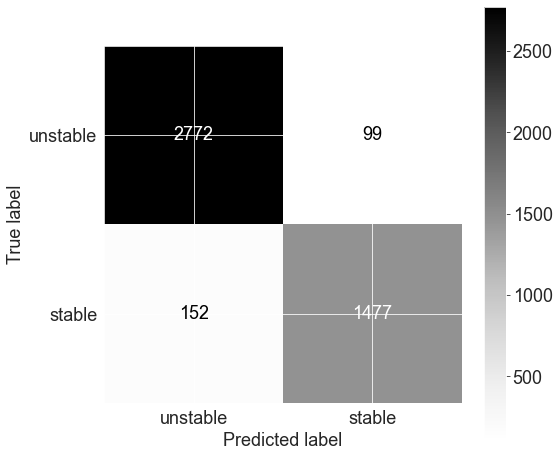

In [185]:
fig, ax = plt.subplots( figsize=(8,8))
plt.rcParams.update({'font.size': 18})
plot_confusion_matrix(xgboost_no_tn_model,
                      X_test,
                      Y_test,
                      cmap='Greys',
                      values_format='d',
                      display_labels=["unstable", "stable"],
                      ax=ax)


In [186]:
y_pred_no_tn = xgboost_no_tn_model.predict(X_test)

print(classification_report(Y_test, y_pred_no_tn))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2871
           1       0.94      0.91      0.92      1629

    accuracy                           0.94      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.94      0.94      0.94      4500



In [187]:
print('xgboost_no_tn_model roc_auc_score: ', roc_auc_score(Y_test, xgboost_no_tn_model.predict_proba(X_test)[:, 1]))

xgboost_no_tn_model roc_auc_score:  0.9888602585624241


# xgboost hyperparameter tuning

In [204]:
# Parameter 1
# param_grid = {
#             'max_depth': [3, 4, 5, 7],
#             'learning_rate': [0.8, 0.9, 0.93, 0.95, 0.99, 1],
#             'gamma': [1],
#             'reg_lambda': [10.0],
#             'scale_pos_weight': [3]
# }
# Output:
# gamma - 1
# learning_rate - 0.9
# max_depth - 4
# reg_lambda - 10.0
# scale_pos_weight - 3
# ----------------------------------------------------------------------------------

# Parameter 2
param_grid = {
    'n_estimators': [150],
    'max_depth': [4],
    'learning_rate': [0.9],
    'gamma': [0.1, 0.25, 0.3, 0.5, 0.7, 0.9, 1,  2, 10],
    'reg_lambda': [9],
    'scale_pos_weight': [5],
    'min_child_weight': [0.95]
}
## Output:
# gamma - 0.25
# learning_rate - 0.9
# max_depth - 4
# reg_lambda - 5.0
# scale_pos_weight - 3
# ----------------------------------------------------------------------------------

# Parameter 3
# param_grid = {
#      'n_estimators': [20, 50, 100, 150, 200, 250, 300],
#     'max_depth': [4,3, 5,7,9,10],
#     'learning_rate': [0.9],
#     'gamma': [0,0.1, 0.25, 0.3, 0.5, 0.7, 0.9, 1,  2, 10],
#     'reg_lambda': [0, 1.0, 3, 5.0, 7, 9],
#      'scale_pos_weight': [1,3,5,7,9],
#      'min_child_weight': [0.01, 0.05, 0.1, 0.5, 0.75, 0.95]
# }

## Output:
'''
gamma - 0
learning_rate - 0.9
max_depth - 4
min_child_weight - 0.95
n_estimators - 150
reg_lambda - 9
scale_pos_weight - 5
'''

# {'gamma': 0.1, 'learning_rate': 0.5, 'max_depth': 4, 'reg_lambda': 10.0, 'scale_pos_weight': 1}
# ----------------------------------------------------------------------------------

optimal_params = GridSearchCV(
    estimator=xgboost.XGBClassifier(tree_method='gpu_hist',
                                objective='binary:logistic',
                                eval_metric="aucpr",
                                seed=42,
                                subsample=0.9,
                                early_stopping_rounds=10,
                                use_label_encoder=False),
                                param_grid=param_grid,
                                scoring='roc_auc',
                                verbose=True,
                                n_jobs = 10,
                                cv = 3
                                )

optimal_params.fit(X_train,
                   Y_train,
                   eval_set=[(X_test, Y_test)],
                   verbose=False)

for key, value in optimal_params.best_params_.items():
    print(key, '-', value)



C:\Users\Rost\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Rost\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Rost\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 3 folds for each of 9 candidates, totalling 27 fits
gamma - 0.1
learning_rate - 0.9
max_depth - 4
min_child_weight - 0.95
n_estimators - 150
reg_lambda - 9
scale_pos_weight - 5


In [208]:
print('xgboost_optimal_params_model roc_auc_score: ', roc_auc_score(Y_test, optimal_params.predict_proba(X_test)[:, 1]))

xgboost_optimal_params_model roc_auc_score:  0.9890315273562877


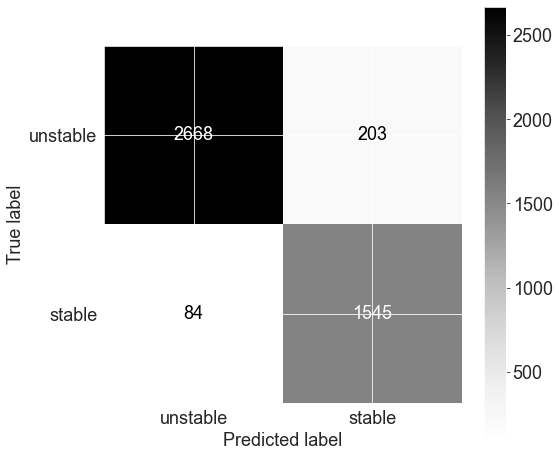

In [201]:
fig, ax = plt.subplots( figsize=(8,8))
plt.rcParams.update({'font.size': 18})
plot_confusion_matrix(optimal_params,
                      X_test,
                      Y_test,
                      cmap='Greys',
                      values_format='d',
                      display_labels=["unstable", "stable"],
                      ax=ax)

In [202]:
# model best parameters launch

xgboost_optimal_params_model = xgboost.XGBClassifier(tree_method='gpu_hist',
                                                    n_estimators=150,
                                                    objective='binary:logistic',
                                                    eval_metric="aucpr",
                                                    gamma=0.3,
                                                    learning_rate=0.9,
                                                    max_depth=4,
                                                    reg_lambda=9,
                                                    scale_pos_weight=5,
                                                    min_child_weight=0.95,
                                                    seed=42,
                                                    use_label_encoder=False)

xgboost_optimal_params_model.fit(
                                X_train,
                                Y_train,
                                verbose=True,
                                early_stopping_rounds=10,
                                eval_set=[(X_test, Y_test)])

'''
tree_method='gpu_hist',
objective='binary:logistic',
eval_metric="aucpr",
gamma=1,
learning_rate=0.3,
max_depth=5,
reg_lambda=10.0,
scale_pos_weight=3,
'''
# xgboost_optimal_params_model roc_auc_score:  0.9871747256010925
# -----------------------------------------------------------------------------

'''
gamma - 0
learning_rate - 0.9
max_depth - 4
min_child_weight - 0.95
n_estimators - 150
reg_lambda - 9
scale_pos_weight - 5
'''
# xgboost_optimal_params_model roc_auc_score:  0.9883618471285964
# -----------------------------------------------------------------------------

[0]	validation_0-aucpr:0.66570
[1]	validation_0-aucpr:0.82525
[2]	validation_0-aucpr:0.86569
[3]	validation_0-aucpr:0.89103
[4]	validation_0-aucpr:0.90597
[5]	validation_0-aucpr:0.91968
[6]	validation_0-aucpr:0.92886
[7]	validation_0-aucpr:0.93260
[8]	validation_0-aucpr:0.93581
[9]	validation_0-aucpr:0.93760
[10]	validation_0-aucpr:0.94176
[11]	validation_0-aucpr:0.94690
[12]	validation_0-aucpr:0.95167
[13]	validation_0-aucpr:0.95330
[14]	validation_0-aucpr:0.95436
[15]	validation_0-aucpr:0.95833
[16]	validation_0-aucpr:0.95879
[17]	validation_0-aucpr:0.95898
[18]	validation_0-aucpr:0.96061
[19]	validation_0-aucpr:0.96131
[20]	validation_0-aucpr:0.96165
[21]	validation_0-aucpr:0.96207
[22]	validation_0-aucpr:0.96347
[23]	validation_0-aucpr:0.96536
[24]	validation_0-aucpr:0.96532
[25]	validation_0-aucpr:0.96574
[26]	validation_0-aucpr:0.96726
[27]	validation_0-aucpr:0.96732
[28]	validation_0-aucpr:0.96936
[29]	validation_0-aucpr:0.97066
[30]	validation_0-aucpr:0.97108
[31]	validation_0-

C:\Users\Rost\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Rost\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-aucpr:0.97344
[38]	validation_0-aucpr:0.97335
[39]	validation_0-aucpr:0.97410
[40]	validation_0-aucpr:0.97386
[41]	validation_0-aucpr:0.97425
[42]	validation_0-aucpr:0.97436
[43]	validation_0-aucpr:0.97456
[44]	validation_0-aucpr:0.97528
[45]	validation_0-aucpr:0.97569
[46]	validation_0-aucpr:0.97572
[47]	validation_0-aucpr:0.97610
[48]	validation_0-aucpr:0.97617
[49]	validation_0-aucpr:0.97607
[50]	validation_0-aucpr:0.97636
[51]	validation_0-aucpr:0.97632
[52]	validation_0-aucpr:0.97659
[53]	validation_0-aucpr:0.97687
[54]	validation_0-aucpr:0.97699
[55]	validation_0-aucpr:0.97713
[56]	validation_0-aucpr:0.97751
[57]	validation_0-aucpr:0.97759
[58]	validation_0-aucpr:0.97790
[59]	validation_0-aucpr:0.97786
[60]	validation_0-aucpr:0.97818
[61]	validation_0-aucpr:0.97837
[62]	validation_0-aucpr:0.97849
[63]	validation_0-aucpr:0.97840
[64]	validation_0-aucpr:0.97844
[65]	validation_0-aucpr:0.97826
[66]	validation_0-aucpr:0.97837
[67]	validation_0-aucpr:0.97825
[68]	val

'\ngamma - 0\nlearning_rate - 0.9\nmax_depth - 4\nmin_child_weight - 0.95\nn_estimators - 150\nreg_lambda - 9\nscale_pos_weight - 5\n'

In [203]:
print('xgboost_optimal_params_model roc_auc_score: ', roc_auc_score(Y_test, xgboost_optimal_params_model.predict_proba(X_test)[:, 1]))

xgboost_optimal_params_model roc_auc_score:  0.9873156321368679


# нарисуем красивое дерево

In [105]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Rost/Downloads/Graphviz/bin/'

In [216]:
xgboost_optimal_params_model = xgboost.XGBClassifier(seed=42,
                                                    eval_metric="aucpr",
                                                    objective='binary:logistic',
                                                    gamma=1,
                                                    learning_rate=0.3,
                                                    max_depth=5,
                                                    reg_lambda=10,
                                                    scale_pos_weight=3,
                                                    subsample=0.9,
                                                    colsample_bytree=0.5,
                                                    n_estimators=1,
                                                    use_label_encoder=False)

xgboost_optimal_params_model.fit(X_train, Y_train)
bst = xgboost_optimal_params_model.get_booster()

node = {'shape': 'box', 'style': 'filled, rounded', 'fillcolor': '#78cbe'}

leaf = {'shape': 'box', 'style': 'filled', 'fillcolor': '#e48038'}

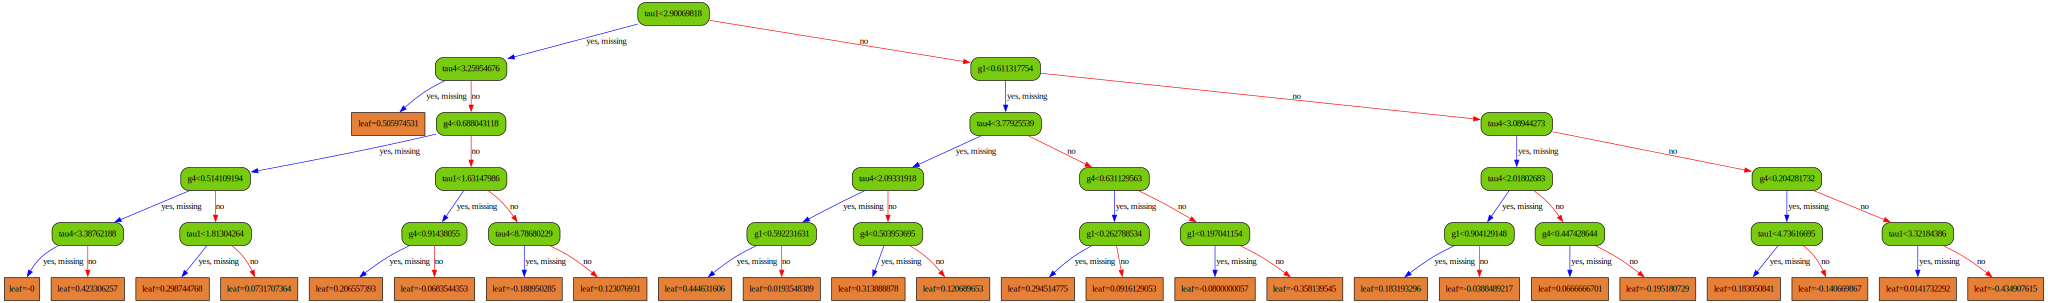

In [217]:
# вывод дерева
xgboost.to_graphviz(xgboost_optimal_params_model, num_trees=0, condition_node_params=node_params, leaf_node_params=leaf_params, size='0,0')

# Итоги по xgboost

In [206]:
print('xgboost_no_tn_model roc_auc_score: ', roc_auc_score(Y_test, xgboost_no_tn_model.predict_proba(X_test)[:, 1]))

xgboost_no_tn_model roc_auc_score:  0.9888602585624241


In [209]:
print('xgboost_optimal_params_model roc_auc_score: ', roc_auc_score(Y_test, optimal_params.predict_proba(X_test)[:, 1]))

xgboost_optimal_params_model roc_auc_score:  0.9890315273562877


# LightGBM

In [101]:
! pip install update lightgbm

In [120]:
import lightgbm

# lightgbm No hyperparameter tuning

In [ ]:
LGBM_no_tn_clf = lightgbm.LGBMClassifier(n_estimators=300)
LGBM_no_tn_clf.fit(X_train, Y_train)

In [149]:
LGBM_no_tn_pred = LGBM_no_tn_clf.predict(X_test)
LGBM_no_tn_cm = confusion_matrix(Y_test,LGBM_no_tn_pred)

print(f'LGBM_no_tn_clf Confusion Matrix:\n {LGBM_no_tn_cm}')

LGBM_no_tn_clf Confusion Matrix:
 [[2757  114]
 [ 136 1493]]


In [128]:
print('LGBM_no_tn_clf roc_auc_score: ', roc_auc_score(Y_test, LGBM_no_tn_clf.predict_proba(X_test)[:, 1]))

LGBM_no_tn_clf roc_auc_score:  0.9890879754980854


# lightgbm hyperparameter tuning

In [103]:
# Parameter 1
LGBM_param_grid = {
    'n_estimators': [ 300, 400, 500, 600, 700], ##1, 5, 10, 100, 200,
    'max_depth': [2, 3, 4, 5, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.4, 0.8],
    'boosting_type': ['gbdt', 'dart', 'goss'],
    ##'gamma': [0.1, 0.25, 0.5, 0.7, 0.9],
    'reg_lambda': [0, 1.0, 5.0, 10.0, 20, 50],
    'scale_pos_weight': [1, 3, 5, 7]
}
# Output: max_depth: 4, learning_rate: 0.1, gamma: 0.25, reg_lambda: 10, scale_pos_weight: 3
# ----------------------------------------------------------------------------------

# Parameter 2
# LGBM_param_grid = {
#     'n_estimators': [1, 5, 10, 100, 200, 300, 400, 500, 600, 700],
#     'max_depth': [4, 6, 8, 10],
#     'learning_rate': [0.3],
#     'gamma': [0],
#     'reg_lambda': [5, 10.0, 20, 50, 100],
#     'scale_pos_weight': [5]
# }
# ----------------------------------------------------------------------------------

LGBMC_optimal_params = GridSearchCV(
    estimator=lightgbm.LGBMClassifier(tree_method='hist',
                                    objective='binary',
                                    seed=42,
                                    subsample=0.9,
                                    colsample_bytree=0.5,
                                    ),
    param_grid=LGBM_param_grid,
    scoring='roc_auc',
    verbose=True,
    n_jobs = 10,
    cv = 3
)

LGBMC_optimal_params.fit(X_train,
                   Y_train,
                   early_stopping_rounds=10,
                   eval_set=[(X_test, Y_test)],
                   verbose=False)

for key, value in LGBMC_optimal_params.best_params_.items():
    print(key, '-', value)

'''
Fitting 3 folds for each of 10800 candidates, totalling 32400 fits
boosting_type - goss
learning_rate - 0.1
max_depth - 4
n_estimators - 600
reg_lambda - 5.0
scale_pos_weight - 1
'''

Fitting 3 folds for each of 10800 candidates, totalling 32400 fits
boosting_type - goss
learning_rate - 0.1
max_depth - 4
n_estimators - 600
reg_lambda - 5.0
scale_pos_weight - 1


'\nFitting 3 folds for each of 24000 candidates, totalling 72000 fits\n[LightGBM] [Warning] Unknown parameter: use_label_encoder\n[LightGBM] [Warning] Unknown parameter: tree_method\n[LightGBM] [Warning] Unknown parameter: eval_metric\n[LightGBM] [Warning] Unknown parameter: gamma\ngamma - 0.1\nlearning_rate - 0.2\nmax_depth - 4\nn_estimators - 500\nreg_lambda - 20\nscale_pos_weight - 7\n'

In [150]:
# model best parameters launch
LGBM_BP_tn_clf = lightgbm.LGBMClassifier(n_estimators=600,learning_rate=0.1,max_depth=4,boosting_type='goss',reg_lambda=5.0,scale_pos_weight=1)
LGBM_BP_tn_clf.fit(X_train, Y_train)

LGBMClassifier(boosting_type='goss', max_depth=4, n_estimators=600,
               reg_lambda=5.0, scale_pos_weight=1)

In [151]:
BP_LGBM_pred = LGBM_BP_tn_clf.predict(X_test)
BP_LGBM_pred_cm = confusion_matrix(Y_test, BP_LGBM_pred)

print(f'LGBM_BP_tn_clf Confusion Matrix:\n {BP_LGBM_pred_cm}')

LGBM_BP_tn_clf Confusion Matrix:
 [[2778   93]
 [ 117 1512]]


In [129]:
print('LGBM_BP_tn_clf roc_auc_score: ', roc_auc_score(Y_test, LGBM_BP_tn_clf.predict_proba(X_test)[:, 1]))

LGBM_BP_tn_clf roc_auc_score:  0.992148576640861


# Lets построим графики из ноутбука лекции c кривыми ROC-AUC

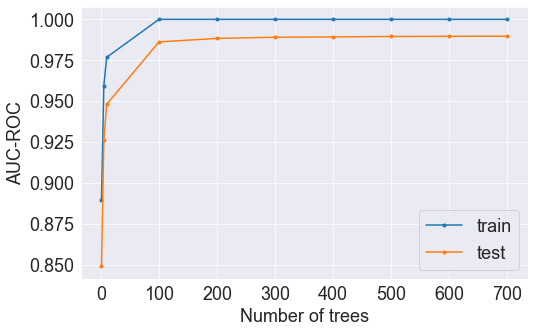

In [152]:
# из ноутбука лекции
n_trees = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700]
quals_train = []
quals_test = []
for n in n_trees:
    clf = lightgbm.LGBMClassifier(n_estimators=n)
    clf.fit(X_train, Y_train)
    q_train = roc_auc_score(Y_train, clf.predict_proba(X_train)[:, 1])
    q_test = roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1])
    quals_train.append(q_train)
    quals_test.append(q_test)

plt.figure(figsize=(8, 5))
plt.plot(n_trees, quals_train, marker='.', label='train')
plt.plot(n_trees, quals_test, marker='.', label='test')
plt.xlabel('Number of trees')
plt.ylabel('AUC-ROC')
plt.legend()

plt.show()

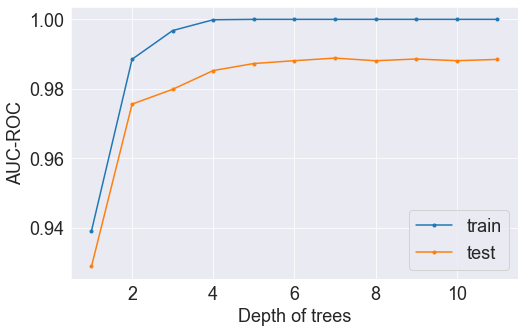

In [153]:
# из ноутбука лекции
depth = list(range(1, 12))
n_trees = 170
quals_train = []
quals_test = []
for d in depth:
    lgb = lightgbm.LGBMClassifier(n_estimators=n_trees, max_depth=d)
    lgb.fit(X_train, Y_train)
    q_train = roc_auc_score(Y_train, lgb.predict_proba(X_train)[:, 1])
    q_test = roc_auc_score(Y_test, lgb.predict_proba(X_test)[:, 1])
    quals_train.append(q_train)
    quals_test.append(q_test)

plt.figure(figsize=(8, 5))
plt.plot(depth, quals_train, marker='.', label='train')
plt.plot(depth, quals_test, marker='.', label='test')
plt.xlabel('Depth of trees')
plt.ylabel('AUC-ROC')
plt.legend()

plt.show()

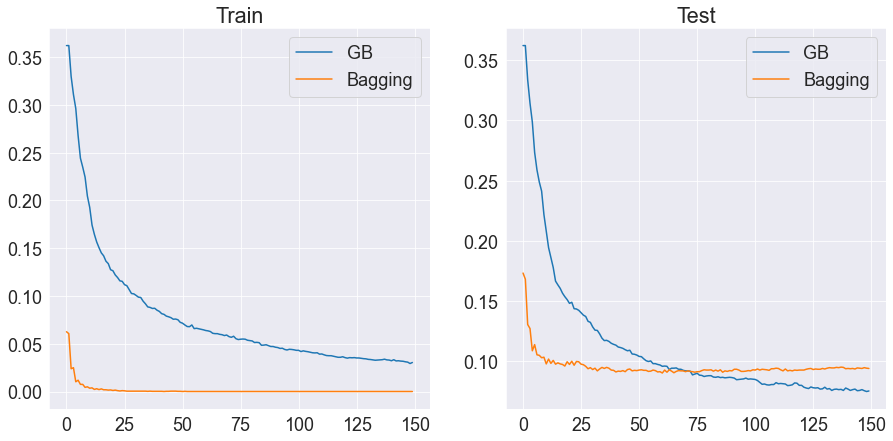

In [154]:
MAX_ESTIMATORS = 150

gbclf = BaggingClassifier(warm_start=True)
err_train_bag = []
err_test_bag = []
for i in range(1, MAX_ESTIMATORS+1):
    gbclf.n_estimators = i
    gbclf.fit(X_train, Y_train)
    err_train_bag.append(1 - gbclf.score(X_train, Y_train))
    err_test_bag.append(1 - gbclf.score(X_test, Y_test))

gbclf = GradientBoostingClassifier(warm_start=True, max_depth=3, learning_rate=0.1)
err_train_gb = []
err_test_gb = []
for i in range(1, MAX_ESTIMATORS+1):
    gbclf.n_estimators = i
    gbclf.fit(X_train, Y_train)
    err_train_gb.append(1 - gbclf.score(X_train, Y_train))
    err_test_gb.append(1 - gbclf.score(X_test, Y_test))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(err_train_gb, label='GB')
plt.plot(err_train_bag, label='Bagging')
plt.legend()
plt.title('Train')
plt.subplot(1, 2, 2)
plt.plot(err_test_gb, label='GB')
plt.plot(err_test_bag, label='Bagging')
plt.legend()
plt.title('Test')
plt.gcf().set_size_inches(15,7)

# Итоги по lightgbm

In [211]:
# Итоги по lightgbm
print('LGBM_no_tn_clf roc_auc_score: ', roc_auc_score(Y_test, LGBM_no_tn_clf.predict_proba(X_test)[:, 1]))

LGBM_no_tn_clf roc_auc_score:  0.9890879754980854


In [210]:
print('LGBM_BP_tn_clf roc_auc_score: ', roc_auc_score(Y_test, LGBM_BP_tn_clf.predict_proba(X_test)[:, 1]))

LGBM_BP_tn_clf roc_auc_score:  0.992148576640861


# CatBoost

In [248]:
# import catboost
# from catboost import CatBoostClassifier

In [249]:
# from catboost import Pool
# from catboost.utils import get_confusion_matrix


# catboost No hyperparameter tuning

In [250]:
# No tuning
# CB_model_NT = CatBoostClassifier( logging_level='Silent', task_type="GPU", devices='0:2')


In [251]:
CB_model_NT.fit(X_train, Y_train)


In [243]:
pred_nt = CB_model_NT.predict(X_test)
print(classification_report(Y_test, pred_nt))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2871
           1       0.95      0.91      0.93      1629

    accuracy                           0.95      4500
   macro avg       0.95      0.94      0.94      4500
weighted avg       0.95      0.95      0.95      4500



In [244]:
CB_NT_cm = get_confusion_matrix(CB_model_NT, Pool(X_train, Y_train))
print(CB_NT_cm)

[[3.508e+03 1.000e+00]
 [5.000e+00 1.986e+03]]


In [245]:
print('catboost_model_NT roc_auc_score: ', roc_auc_score(Y_test, CB_model_NT.predict_proba(X_test)[:, 1]))

catboost_model_NT roc_auc_score:  0.9904237010352461


# catboost hyperparameter tuning

In [181]:
train_pool = catboost.Pool(X_train, Y_train)
test_pool = catboost.Pool(X_test, Y_test)

In [155]:
# hyperparameter tuning
# grid_1 = {
#     'learning_rate': [0.03, 0.1, 0.3, 0.9],
#     'bootstrap_type':['Bayesian'],
#     'bagging_temperature': [0, 1, 10],
#     'depth':[8, 10],
#     'l2_leaf_reg': [5]
# }
# grid_2 = {
#     'learning_rate': [0.03, 0.1, 0.3, 0.9],
#     'bootstrap_type':['Bernoulli'],
#     'subsample': [0.66, 0.7, 0.8],
#     'depth':[8, 10],
#     'l2_leaf_reg': [5]
# }
# grid_search_results = CB_model.grid_search([grid_1, grid_2], train_pool, shuffle=False, verbose=4, plot=True)

# # no depth & no l2_leaf_reg - fast
# 'depth':[4, 6, 10] ON - START: 15.18 -- STOP: 16.05 result {'depth': 10, 'subsample': 0.66, 'learning_rate': 0.3, 'bootstrap_type': 'Bernoulli'}

# depth is off, l2_leaf_reg on [1, 3, 5] [2, 3, 4] - START: 16.08 -- Stop: 16.25 {'l2_leaf_reg': 4,'subsample': 0.8,'learning_rate': 0.3, 'bootstrap_type': 'Bernoulli'}

# depth is off, l2_leaf_reg on  [1, 2, 3, 4, 5] - START: 16.32 --STOP: 17.01 {'l2_leaf_reg': 5, 'subsample': 0.66, 'learning_rate': 0.3, 'bootstrap_type': 'Bernoulli'}

# 'depth':[8, 10]; l2_leaf_reg: [5] - START: 17.05 --STOP: 17.45 depth='8', l2_leaf_reg='5', subsample='0.66', learning_rate='0.1', bootstrap_type='Bernoulli'


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Grid #0
0:	loss: 0.1711430	best: 0.1711430 (0)	total: 32.1s	remaining: 12m 17s
4:	loss: 0.1681624	best: 0.1326109 (1)	total: 3m 13s	remaining: 12m 15s
8:	loss: 0.1655989	best: 0.1326109 (1)	total: 8m 1s	remaining: 13m 22s
12:	loss: 0.1624969	best: 0.1313385 (10)	total: 10m 53s	remaining: 9m 13s
16:	loss: 0.2426390	best: 0.1302117 (14)	total: 15m 50s	remaining: 6m 31s
20:	loss: 0.2332106	best: 0.1302117 (14)	total: 19m 4s	remaining: 2m 43s
23:	loss: 0.2313024	best: 0.1302117 (14)	total: 23m 43s	remaining: 0us
Grid #1
0:	loss: 0.1711430	best: 0.1711430 (0)	total: 32.1s	remaining: 12m 17s
4:	loss: 0.1681624	best: 0.1326109 (1)	total: 3m 15s	remaining: 12m 23s
8:	loss: 0.1711430	best: 0.1326109 (1)	total: 8m 4s	remaining: 13m 27s
12:	loss: 0.1681624	best: 0.1326109 (1)	total: 10m 37s	remaining: 8m 59s
16:	loss: 0.1711430	best: 0.1326109 (1)	total: 15m 25s	remaining: 6m 21s
20:	loss: 0.1681624	best: 0.1326109 (1)	total: 17m 58s	remaining: 2m 34s
23:	loss: 0.1668730	best: 0.1326109 (1)	total

In [188]:
CB_tn_model = CatBoostClassifier(iterations=200, logging_level='Silent', task_type="GPU", devices='0:1', depth=8, l2_leaf_reg=5, subsample=0.66, learning_rate=0.1,
                              bootstrap_type='Bernoulli')

In [189]:
CB_tn_model.fit(X_train, Y_train)

In [190]:

pred = CB_tn_model.predict(X_test)
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2871
           1       0.95      0.92      0.93      1629

    accuracy                           0.95      4500
   macro avg       0.95      0.95      0.95      4500
weighted avg       0.95      0.95      0.95      4500



In [191]:
CB_cm = get_confusion_matrix(CB_tn_model, Pool(X_train, Y_train))
print(CB_cm)

[[3509.    0.]
 [   0. 1991.]]


number_of_trees: 2
roc_auc_score: 0.9047663185911742
confusion_matrix: 
 [[3298.  211.]
 [ 506. 1485.]]

number_of_trees: 5
roc_auc_score: 0.9304224266756813
confusion_matrix: 
 [[3334.  175.]
 [ 455. 1536.]]

number_of_trees: 10
roc_auc_score: 0.9434471939393512
confusion_matrix: 
 [[3342.  167.]
 [ 390. 1601.]]

number_of_trees: 50
roc_auc_score: 0.9749267617432983
confusion_matrix: 
 [[3434.   75.]
 [ 206. 1785.]]

number_of_trees: 100
roc_auc_score: 0.9826610124444632
confusion_matrix: 
 [[3468.   41.]
 [ 111. 1880.]]

number_of_trees: 120
roc_auc_score: 0.9851428063150932
confusion_matrix: 
 [[3484.   25.]
 [  85. 1906.]]

number_of_trees: 140
roc_auc_score: 0.9862108308161525
confusion_matrix: 
 [[3489.   20.]
 [  64. 1927.]]

number_of_trees: 180
roc_auc_score: 0.9876517551630272
confusion_matrix: 
 [[3496.   13.]
 [  37. 1954.]]

number_of_trees: 200
roc_auc_score: 0.9912723475306825
confusion_matrix: 
 [[3509.    0.]
 [   0. 1991.]]

number_of_trees: 220
roc_auc_score: 0.99159

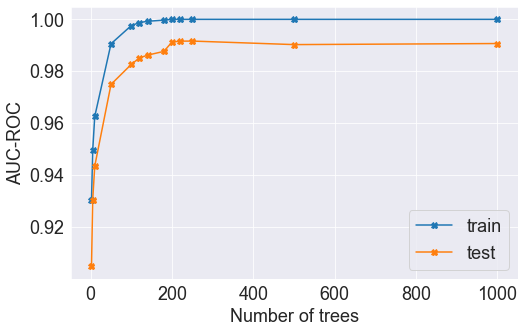

In [247]:
# num of trees tuning
n_trees = [2, 5, 10, 50, 100, 120, 140, 180, 200, 220, 250, 500, 1000]
quals_train = []
quals_test = []
for n in n_trees:
    clf_tn = CatBoostClassifier(iterations=n, logging_level='Silent',
                                task_type="GPU", devices='0:1', depth=8,
                                l2_leaf_reg=5, subsample=0.66,
                                learning_rate=0.1, bootstrap_type='Bernoulli')
    clf_tn.fit(X_train, Y_train)
    q_train = roc_auc_score(Y_train, clf_tn.predict_proba(X_train)[:, 1])
    q_test = roc_auc_score(Y_test, clf_tn.predict_proba(X_test)[:, 1])
    quals_train.append(q_train)
    quals_test.append(q_test)
    clf_tn_cm = get_confusion_matrix(clf_tn, Pool(X_train, Y_train))
    print(f'number_of_trees: {n}\nroc_auc_score: {roc_auc_score(Y_test, clf_tn.predict_proba(X_test)[:, 1])}')
    print(f'confusion_matrix: \n {clf_tn_cm}\n')


plt.figure(figsize=(8, 5))
plt.plot(n_trees, quals_train, marker='X', label='train')
plt.plot(n_trees, quals_test, marker='X', label='test')
plt.xlabel('Number of trees')
plt.ylabel('AUC-ROC')
plt.legend()

plt.show()

# Итоги CATBOOST

In [246]:
print('catboost_model_NT roc_auc_score: ', roc_auc_score(Y_test, CB_model_NT.predict_proba(X_test)[:, 1]))

catboost_model_NT roc_auc_score:  0.9904237010352461


In [230]:
print('catboost_BP_tn_clf roc_auc_score: ', roc_auc_score(Y_test, clf_tn.predict_proba(X_test)[:, 1]))

catboost_BP_tn_clf roc_auc_score:  0.991631776797205


# Общий итог.

для подведения итога соберем датасет с результатами.

In [270]:
model_names = ['sklearn', 'XGBoost', 'LightGBM', 'CatBoost'] # список моделей, для задания индекса

In [367]:
No_tuning_params = \
    [str(round(roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]), 5)) for model in [sk_no_tn_gb_clf, xgboost_no_tn_model, LGBM_no_tn_clf, CB_model_NT]]

In [365]:
tuned_params = \
    [str(round(roc_auc_score(Y_test, tun_model.predict_proba(X_test)[:, 1]), 5)) for tun_model in [BP_gb_clf,optimal_params, LGBM_BP_tn_clf, clf_tn]]

In [359]:
difference = list(map(lambda x, y: str(round(x-y, 5)), tuned_params, No_tuning_params))

In [371]:
result_dataset = pd.DataFrame(list(zip(No_tuning_params, tuned_params, difference)), index = model_names, columns = ['No_tuning_params', 'tuned_params', 'difference'])

In [372]:
result_dataset # сводный датасет

,No_tuning_params,tuned_params,difference
sklearn,0.95646,0.98886,0.0324
XGBoost,0.98886,0.98903,0.00017
LightGBM,0.98909,0.99215,0.00306
CatBoost,0.99042,0.99068,0.00026


In [373]:
import seaborn as sns
cm = sns.dark_palette("red", as_cmap=True)

In [390]:
result_dataset.style.highlight_max(color="red")

,No_tuning_params,tuned_params,difference
sklearn,0.95646,0.98886,0.0324
XGBoost,0.98886,0.98903,0.00017
LightGBM,0.98909,0.99215,0.00306
CatBoost,0.99042,0.99068,0.00026


Итак, по данным можно сделать вывод, что тюнинг гиперпараметров не дал значимого прироста в моделях, кроме sklearn.
Однако тюнинг гиперпараметров хорошо показал себя в confusion matrix.
Лучше всех себя показал LightGBM - хороший результат в дефолтных настройках и быстрое обучение на гиперпараметрах, в отличии от XGBoost, который обучался почти 12 часов.